In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
connection = sqlite3.connect("../db.sqlite3")
query = pd.read_sql(
    "SELECT * "
    "FROM restaurant_orderitem "
    "INNER JOIN restaurant_order "
    "ON restaurant_order.id = restaurant_orderitem.order_id "
    "INNER JOIN restaurant_product "
    "ON restaurant_orderitem.product_id = restaurant_product.id ;",
    connection
)
query.to_csv("orders.csv", index=False)
df = pd.read_csv("orders.csv")
df = df.drop(["id", "id.1", "id.2", "order_id", "product_id"], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  74818 non-null  int64  
 1   datetime  74818 non-null  object 
 2   price     74818 non-null  float64
 3   name      74818 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


,quantity,datetime,price,name
0,2,2019-08-03 20:25:00,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,8.95,Paneer Tikka Masala


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

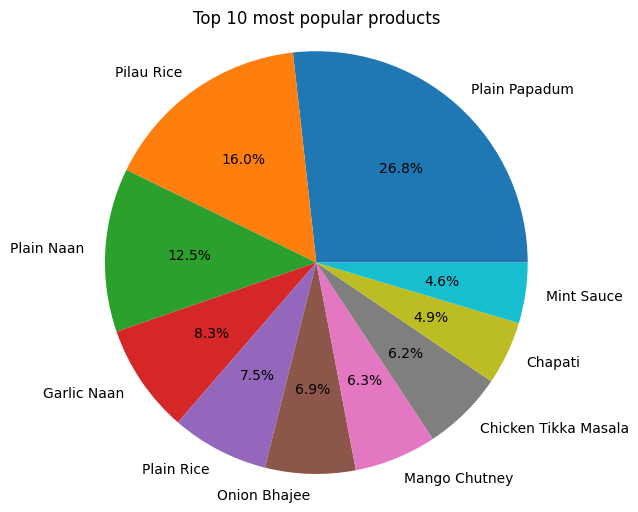

In [109]:
most_popular = df.groupby("name")["quantity"].sum().sort_values(ascending=False)[:10]
percentage = (most_popular / most_popular.sum()) * 100
plt.figure(figsize=(6, 6))
plt.pie(percentage, labels=percentage.index, autopct="%1.1f%%")
plt.title("Top 10 most popular products")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

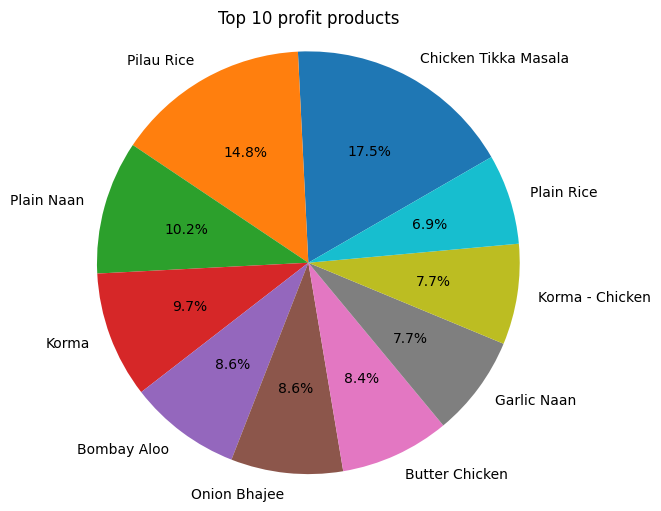

In [7]:
df["order_income"] = df["quantity"] * df["price"]
most_profit = df.groupby("name")["order_income"].sum().sort_values(ascending=False)[:10]
percentage = (most_profit / most_profit.sum()) * 100
plt.figure(figsize=(6, 6))
plt.pie(percentage, labels=percentage.index, autopct="%1.1f%%", startangle=30)
plt.title("Top 10 profit products")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

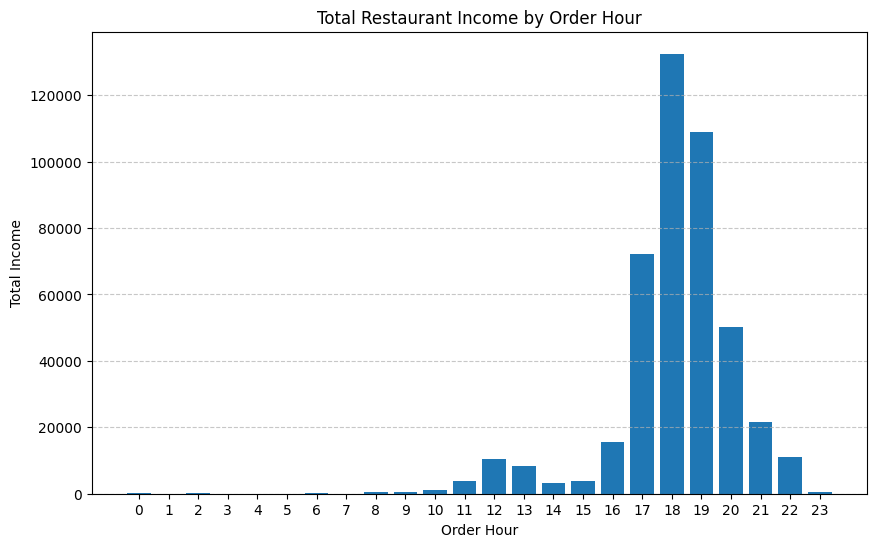

In [39]:
df["order_hour"] = pd.to_datetime(df["datetime"]).dt.hour
hour_income = df.groupby("order_hour")["order_income"].sum()
plt.figure(figsize=(10, 6))
plt.bar(hour_income.index, hour_income.values)
plt.title("Total Restaurant Income by Order Hour")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

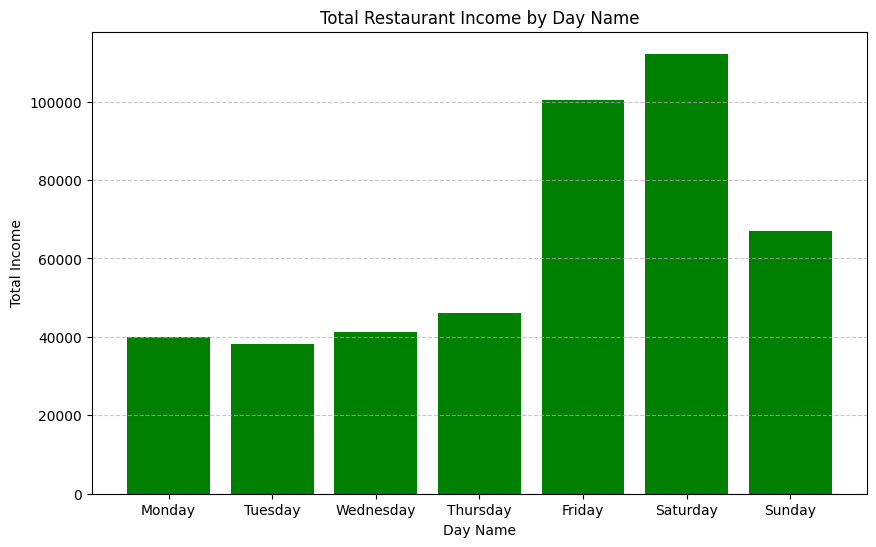

In [53]:
days_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df["day_name"] = pd.to_datetime(df["datetime"]).dt.day_name()
df["day_name"] = pd.Categorical(df["day_name"], categories=days_name, ordered=True)
day_income = df.groupby("day_name")["order_income"].sum()
plt.figure(figsize=(10, 6))
plt.bar(day_income.index, day_income.values,  color="g")
plt.title("Total Restaurant Income by Day Name")
plt.xlabel("Day Name")
plt.ylabel("Total Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()